In [1]:
import pandas as pd
import pickle
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error

In [2]:
# Yellow Taxi Trip Records for January and February 2023

link = 'https://d37ci6vzurychx.cloudfront.net/trip-data/'
data = 'yellow_tripdata_2023-01.parquet'

datapath = link + data

In [42]:
# Question 1
df_train = pd.read_parquet(datapath)
print(f'Number of columns for Jan 23: {len(df_train.columns)}')

Number of columns for Jan 23: 19


In [43]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [44]:
# Question 2
df_train['duration'] = df_train.tpep_dropoff_datetime - df_train.tpep_pickup_datetime
df_train.duration = df_train.duration.apply(lambda td: td.total_seconds() / 60)

In [45]:
print(f'Standard deviation of trip duration: {np.std(df_train.duration)}')

Standard deviation of trip duration: 42.59434429744777


In [46]:
# Question 3
with_outlier = len(df_train)

df_train = df_train[(df.duration >= 1) & (df_train.duration <= 60)]
without_outlier = len(df_train)

frac = 1- ((with_outlier - without_outlier) / with_outlier)
print(f'Fraction of the records left after droping outliers: {frac}')

Fraction of the records left after droping outliers: 0.9812202822125979


In [47]:
# Question 4
categorical = ['PULocationID', 'DOLocationID']

df_train[categorical] = df_train[categorical].astype(str)
train_dicts = df_train[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

print(f'Size of feature matrix: {X_train.shape}')

Size of feature matrix: (3009173, 515)


In [48]:
# Question 5
target = 'duration'
y_train = df_train[target].values

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

np.float64(7.649261934850555)

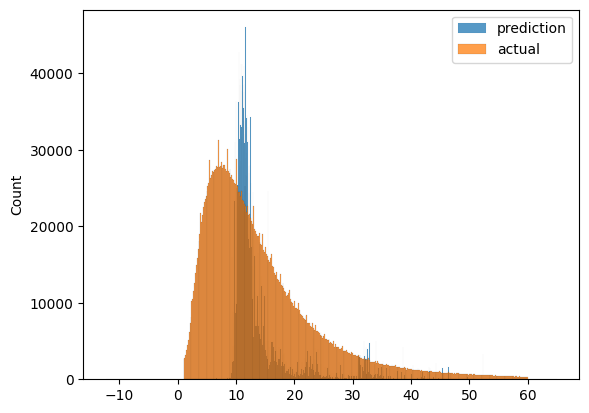

In [50]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

In [58]:
# Question 6

def read_data(filename):
    df = pd.read_parquet(filename)
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
    
    df = df[(df.duration >= 1) & (df.duration <= 60)]

    df[categorical] = df[categorical].astype(str)

    return df


data_val = 'yellow_tripdata_2023-02.parquet'
datapath_val = link + data_val

df_val = read_data(datapath_val)

In [61]:
val_dicts = df_val[categorical].to_dict(orient='records')

X_val = dv.transform(val_dicts)
y_val = df_val.duration.values

In [63]:
y_pred = lr.predict(X_val)

2855951

In [64]:
print(f'RMSE for validation dataset: {root_mean_squared_error(y_val, y_pred)}')

RMSE for validation dataset: 7.811817745843695
